<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ceros_funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Codigo Markdown:
Los numeras a, b, c y d tiene que ver con escritura en código Markdown y comandos de latex: 

a. Escriba en pseudocódigo los pasos para aplicar el método de la bisección.

b. Realice la deducción del metodo de Newton-Rapshon, se recomienda escribir las ecuaciones en formato latex, para ello puede emplear las siguientes expresiones:

c. ¿Cuál es la diferencia del metodo de Newton-Rapson con respecto al de la secante?


d. Escriba en pseudocódigo los pasos para aplicar el método Punto Fijo.



Comentarios para escribir en latex

*   Entre simbolos \$ \$, puedes porner expresiones  puede poner expresiones, ejemplo:  $y = a_0 x^2 + b_1$  

*  Las funciones pueden ser definidas entre \\$,  poniendo un \\, antes de la funcion ejemplo: \\$ \\sinx \\$,   asi las funciones quedarian de esta manera : 

> $\sin x$, $\tan x$, $\sec x$, $\sqrt{a} $, $\frac{a}{b}, \frac{df}{dt}$

* Puedes generar tambien escribir ecuaciones con la instrucción:

  \\begin{equation} 

    \\sin x  
  
  \\end{equation}

Ejemplo:

  \begin{equation} 
    \frac{df}{dx} = \sin x  
  \end{equation}







a. El método de la bisección es un algoritmo para encontrar la raíz de una función en un intervalo dado [a,b], siempre y cuando los signos de la función en a y b sean diferentes. El procedimiento es el siguiente:

Definir un intervalo [a,b] en el cual los signos de los dos extremos deben ser diferentes.
Encontrar el punto medio del intervalo $$ c = \frac{(a+b)}{2}$$
Evaluar la función en c y determinar en qué mitad del intervalo se encuentra la raíz.
Si la raíz está en la primera mitad del intervalo, el nuevo intervalo será [a,c]. Si la raíz está en la segunda mitad, el nuevo intervalo será [c,b].
Repetir los pasos 2 a 4 hasta que el valor de la función en el punto medio sea suficientemente cercano a cero, lo que indica que se ha encontrado la raíz.


b. El método de Newton-Raphson es un algoritmo para encontrar las raíces de una función a través de la aproximación sucesiva de la solución a partir de un valor inicial. La idea central es utilizar la recta tangente a la curva de la función en un punto dado, para aproximar la raíz de la función. El procedimiento es el siguiente:

Se parte de un valor inicial $x_0$ cercano a la raíz buscada.
Se calcula la pendiente de la recta tangente a la curva de la función en el punto $x_0$. Esto se logra a través del cálculo de la derivada de la función en $x_0$: $f'(x_0)$.
Se encuentra el punto en el eje x donde la recta tangente cruza el eje x, es decir, donde la función es igual a cero: $$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$
Se repite el paso anterior con $$x_{n+1}$$ como nuevo punto de partida hasta alcanzar la precisión deseada.

c. La principal diferencia entre el método de Newton-Raphson y el método de la secante es que el primero utiliza la derivada de la función en cada iteración para aproximar la raíz, mientras que el segundo utiliza una aproximación de la derivada basada en los dos últimos puntos evaluados. Esto significa que el método de Newton-Raphson puede converger más rápido que el método de la secante, pero puede ser más sensible a la elección del valor inicial y puede diverger en algunos casos. Además, el método de la secante requiere menos cálculos de derivadas, lo que puede ser una ventaja en funciones complicadas o costosas de derivar.







d. El método del Punto Fijo es un algoritmo iterativo que se utiliza para encontrar soluciones de ecuaciones de la forma $g(x) = x$. El algoritmo se implementa siguiendo los siguientes pasos:

Seleccionar una función $g(x)$ y un punto inicial $x_0$.

Definir la iteración $x_{n+1} = g(x_n)$.

Calcular el siguiente valor de la función iterando $g(x_n)$ hasta que se alcance la tolerancia deseada o un número máximo de iteraciones.

Si se alcanza la tolerancia deseada, se devuelve $x_{n+1}$ como la aproximación de la solución.

Si se alcanza el número máximo de iteraciones sin haber alcanzado la tolerancia deseada, se devuelve un mensaje de error indicando que el método no ha convergido.

# 2. Ceros de funciones
*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$ por diferentes metodos, bisection, newton-rapshon, punto fijo.




 

In [3]:
import numpy as np 
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sp

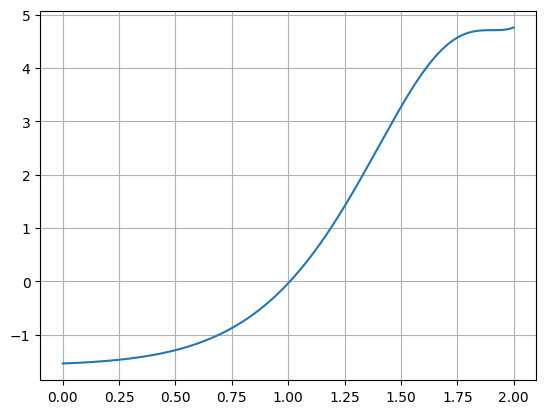

In [44]:
#Función para hallar las raíces:
def f(x):
  return -2+np.exp(x)-np.cos((np.exp(x))-2)
x_=np.linspace(0,2,1000)
plt.plot(x_,f(x_))
plt.grid()



# Bicepccion



In [46]:
#elegimos el intervalo a conveniencia por la gráfica:
(a,b)=(0.75,1.25)
P_b= optimize.bisect(f, a, b, xtol=2e-12)
print('La raiz hallada por bisección es:',P_b)

La raiz hallada por bisección es: 1.0076239716563578


## newton raphson

In [47]:
#Encontramos la derivada
x=sp.symbols('x')

def fun_s(x):
  return -2+sp.exp(x)-sp.cos((sp.exp(x))-2)

dev_s=sp.diff(fun_s(x),x)
print(dev_s)

exp(x)*sin(exp(x) - 2) + exp(x)


1.0076239716581368


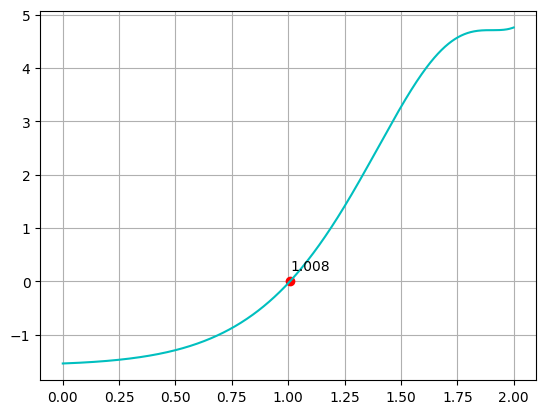

In [48]:
#Aplicamos interpolacion y graficamos
f_p=sp.lambdify(x,dev_s,'numpy')
P_n=optimize.newton(f,1,f_p)
print(P_n)

plt.figure(facecolor="w")
plt.plot(P_n,0,"ro")
plt.text(P_n,0.2,f'{P_n:.4}')
plt.plot(x_,f(x_),"c")
plt.grid()


## Punto fijo






In [56]:
def g(x):
  return x-f(x) # se hace para poder encontrar los ceros con la recta identidad
x=np.linspace(-2,2,1000)
P_p=optimize.fixed_point(g,0.5)
print(P_p) #raiz

1.0076239716581368


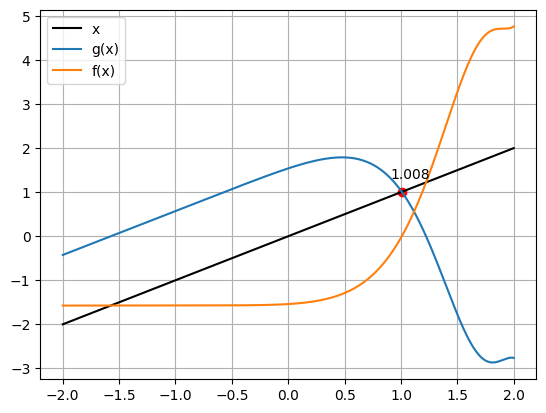

In [57]:
plt.plot(P_p,P_p,'ro')
plt.text(P_p-0.1,1.3,f'{P_p:.4}')
plt.plot(x,x,'k',label='x')
plt.plot(x,g(x),label='g(x)')
plt.plot(x,f(x),label='f(x)')
plt.legend()
plt.grid()

# 3. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

In [14]:
#condiciones iniciales
def posicion_t(omega):
  return ((-9.76/(2*omega**2))*((np.exp(omega) - np.exp(-omega))/2 - np.sin(omega)))-0.51

In [38]:
raiz = optimize.newton(posicion_t, -0.2, tol=1e-05)
print("La rapidez ω con que cambia θ es de", raiz)

La rapidez ω con que cambia θ es de -0.3135209838641948


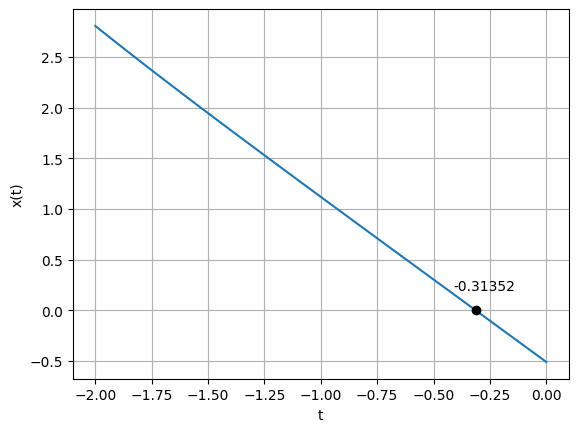

In [39]:
x= np.linspace(-2, -0.000005)
plt.plot(x,posicion_t(x) )
plt.plot(raiz,0,'ko')
plt.text(raiz-0.1,0.2,f'{raiz:.5}')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

#4.  Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)


ecuacion de el area 

\begin{equation}
 Area = 2*\frac{(rcos(\frac{\theta}{2})*(rsin(\frac{\theta}{2})}{2}
\end{equation}

tomandoo como funcion 

\begin{equation}
 f(\theta) = \theta - \sin(\theta) - \frac{\pi}{2}
\end{equation}



In [16]:
def fun(θ): 
  return θ - np.sin(θ) - np.pi/2
θ= np.linspace(-np.pi,np.pi,1000)

In [17]:
df=pd.DataFrame()
df["θ"]=θ
df["funcion"]=fun(θ)
df

,θ,funcion
0,-3.141593,-4.712389
1,-3.135303,-4.699810
2,-3.129014,-4.687231
3,-3.122724,-4.674653
4,-3.116435,-4.662076
...,...,...
995,3.116435,1.520483
996,3.122724,1.533061
997,3.129014,1.545639
998,3.135303,1.558217


In [18]:
#metodo bicepcion
root2= optimize.bisect(fun,-3,3)
root2

2.3098814600093647

<ipython-input-19-f97dccb81be2>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(root2,0,"ro", color='coral')


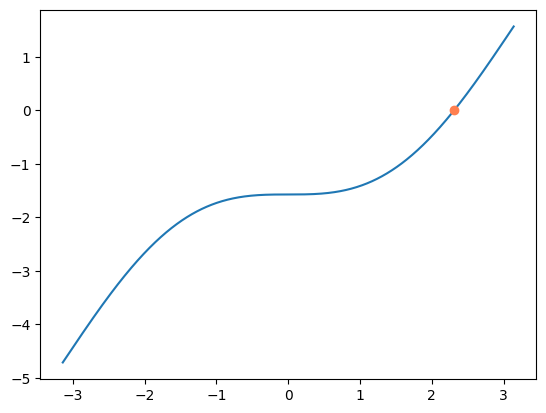

In [19]:
plt.plot(θ, fun(θ))
plt.plot(root2,0,"ro", color='coral')

In [20]:
#metodo newton
def fun(θ): 
  return θ - np.sin(θ) - np.pi/2

In [21]:
#calcular la derivada 
θ=sp.Symbol("θ")
def fun_(θ):
  return θ - sp.sin(θ) - sp.pi/2
df= sp.diff( fun_(θ),θ)
df

1 - cos(θ)

In [22]:
fun_p= sp.lambdify(θ,df,'numpy')

In [23]:
#calculamos el punto
P_2=optimize.newton(fun,2,fun_p)
P_2

2.3098814600100575

<ipython-input-24-90657b266df4>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(P_2,0,"ro", color='coral')


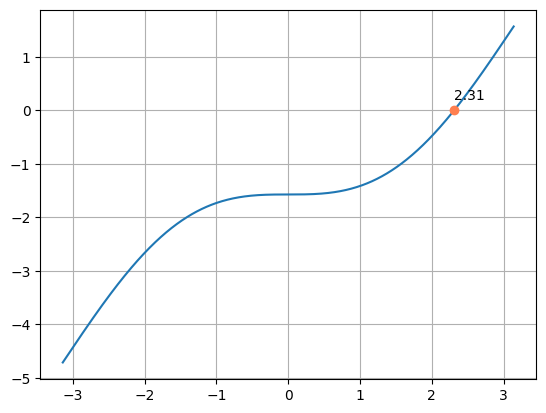

In [24]:
θ= np.linspace(-np.pi,np.pi,1000)
plt.plot(θ, fun(θ))
plt.plot(P_2,0,"ro", color='coral')
plt.text(P_2,0.2,f'{P_2:.4}')
plt.grid()

In [25]:
#metodo punto fijo
def g_2(θ):
  return θ - fun(θ)

In [26]:
p_3= optimize.fixed_point(g_2,2)
p_3

array(2.30988146)

<ipython-input-27-4cf730d129cc>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(p_3,0,"ro", color='coral')


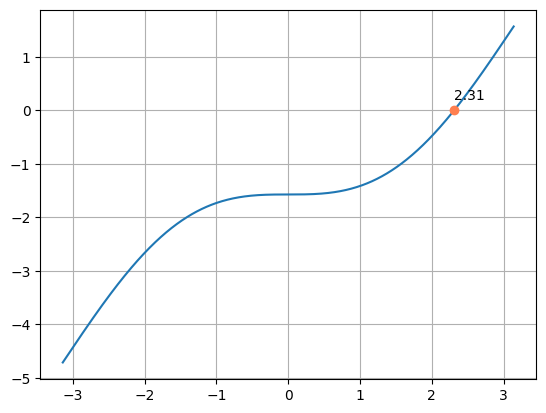

In [27]:
θ= np.linspace(-np.pi,np.pi,1000)
plt.plot(θ, fun(θ))
plt.plot(p_3,0,"ro", color='coral')
plt.text(p_3,0.2,f'{p_3:.4}')
plt.grid()



# 3. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.


In [28]:
# Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [29]:

# Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x =(u * np.cos(alpha))*t + (1/b)*(v0 * np.cos(theta) - u * np.cos(alpha)) * (1 - np.exp(-b*t))
  return x

# Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):
  y = (1/b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha)) * (1 - np.exp(-b*t)) - (g/b - u*np.sin(alpha)*t)
  return y

In [30]:
t = np.linspace(0,45,1000) #definimos un tiempo desde que sale el proyectil hasta que vuelve a pasar por el cero

x = pos_x(t,theta, alpha, v0, b, u, g)
y = pos_y(t,theta, alpha, v0, b, u, g)
     

In [31]:
dicc = {"X":x, "Y":y,"Tiempo": t }
df = pd.DataFrame(dicc)
df

,X,Y,Tiempo
0,0.000000,-196.000000,0.000000
1,1.907428,-185.272157,0.045045
2,3.807525,-174.568449,0.090090
3,5.700307,-163.888821,0.135135
4,7.585791,-153.233219,0.180180
...,...,...,...
995,-50.121853,4065.380592,44.819820
996,-51.126623,4066.521530,44.864865
997,-52.132173,4067.659903,44.909910
998,-53.138501,4068.795714,44.954955


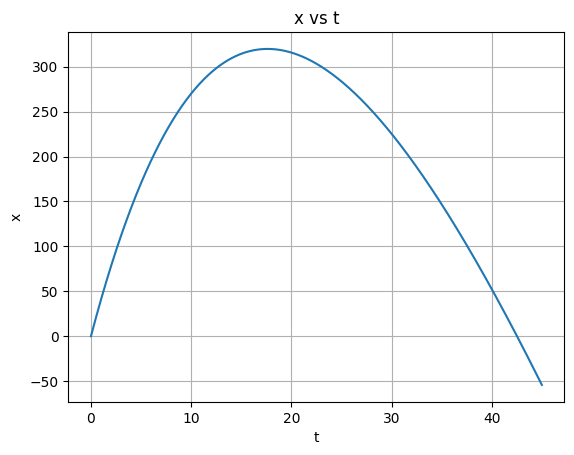

In [32]:
# grafica de la posicion sobre el tiempo

plt.plot(t,x)
plt.title("x vs t")
plt.xlabel('t')
plt.ylabel('x')

plt.grid()

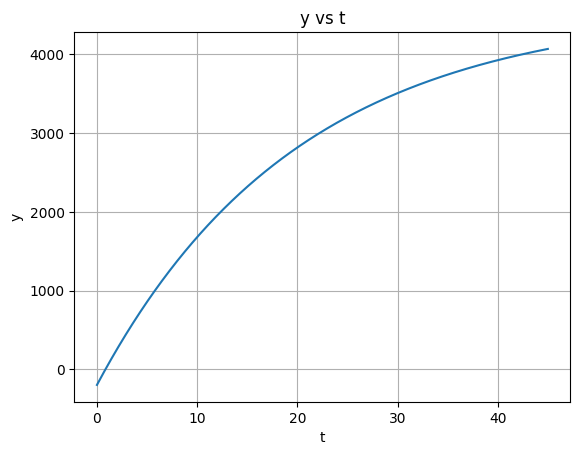

In [33]:
#grafica de la posicion en y con respecto al tiempo

plt.plot(t,y)
plt.title("y vs t")
plt.xlabel('t')
plt.ylabel('y')
plt.grid()

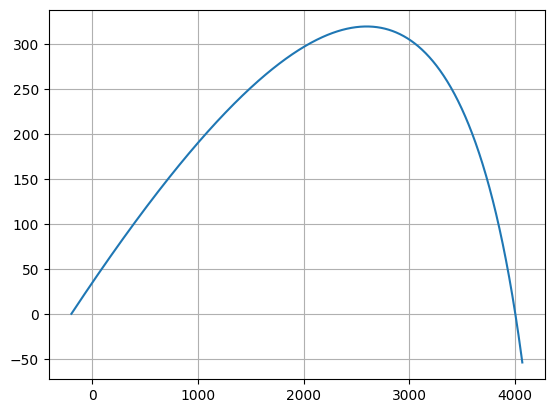

In [34]:
plt.plot(y,x)
plt.grid()

In [35]:
#para calcular la mayor distanica hallamos cuando se hace 0 el eje x
cero_x= optimize.bisect(pos_x,35,45,args=(45*np.pi/180,np.pi, 60, 0.05, 30,9.8))
print("distancia mas larga" , cero_x)

distancia mas larga 42.52463670404609



# 4. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

```
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```

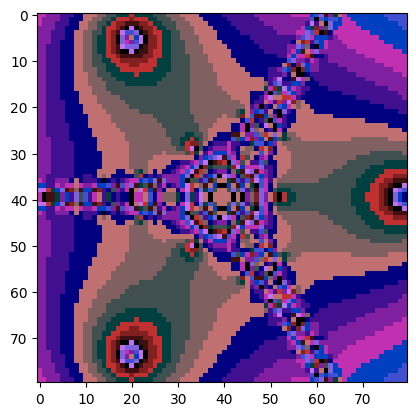

In [36]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)